## Comparisons between buzzard and cosmoDC2 (Seagull investigations)

In [109]:
import camb
import pyccl as ccl
import numpy as np
import matplotlib
from scipy.stats import binned_statistic as bs
mpl = matplotlib
mpl.use('Agg') # Must be before importing matplotlib.pyplot
mpl.rcParams['font.size'] = 13.0
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 'small'
mpl.rcParams['figure.dpi'] = 200.0
mpl.rcParams['lines.markersize'] = 4.0
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['xtick.major.size'] = 5.0
mpl.rcParams['xtick.minor.size'] = 3.0
mpl.rcParams['ytick.major.size'] = 5.0
mpl.rcParams['ytick.minor.size'] = 3.0
import matplotlib.pyplot
plt = matplotlib.pyplot
from astropy.table import Table
import sys
#sys.path.insert(0,'/global/homes/p/plarsen/gcr-catalogs')
#import GCR
#from GCR import GCRQuery
#import GCRCatalogs           
import astropy
import astropy.table
import healpy as hp



import time

%matplotlib inline

These are files of all the buzzard, cosmodc2 and skysim galaxies at MAG_R_LSST<27, z<3 in the same sky area. I have read in the relevant quantities using GCR and have output these to fits files. While I'm including skysim in this comparison, sometimes I'm supressing these result in the output plots if it agrees well with cosmodc2 and just adds an extra plot. 

This is 3 nside=8 pixels, this is the only exactly overlapping area that you can read in natively and comprises about half of cosmodc2 - we can also cut out the cosmodc2 region properly which would be the next step.

In [90]:
file_name = '/global/projecta/projectdirs/lsst/groups/CS/cosmoDC2/plarsen_tmp/cutout_cat/cosmodc2_cutout_comp_z3_lowmag_27.fits'
file_name2 = '/global/projecta/projectdirs/lsst/groups/CS/cosmoDC2/plarsen_tmp/cutout_cat/buzzard_cutout_comp_z3_lowmag_27.fits'
file_name3 = '/global/projecta/projectdirs/lsst/groups/CS/cosmoDC2/plarsen_tmp/cutout_cat/skysim_cutout_comp_z3_lowmag_27.fits'

file_in_cosmo = astropy.table.Table.read(file_name)
file_in_buzz = astropy.table.Table.read(file_name2)
file_in_sky = astropy.table.Table.read(file_name3)


First let's make some simple seagull plots, to see the amount of "seagulling" in these areas. You can see that this effect exists in all three simulations. We then make comparison plots to check the level of this effect and you see it's around twice as large in cosmodc2 and affects shear2 most while in buzzard it affects shear1 most. 

This may look slightly different to the levels you're used to seeing, as this seems to be affected by the magnitude cut and redshift cuts as well as the sky area. 

In [94]:
def make_sg_plot(data,cat_name):
    bn=500
    
    s1 = data['SHEAR1']
    s2 = data['SHEAR2']
    
    a, zedge, binn = bs(s1, s2, bins=bn, statistic='mean')
    a2, zedge2, binn = bs(s2, s1, bins=bn, statistic = 'mean')
    zvals = (zedge[1:]+zedge[:-1])/2.
    zvals2 = (zedge2[1:]+zedge2[:-1])/2.

    plt.figure()
    plt.title(cat_name)
    plt.plot(zvals,a,label='shear_1')
    plt.plot(zvals2,a2,label='shear_2')
    plt.xlim([-0.05,0.05])
    plt.ylim([-0.005,0.005])
    plt.plot(zvals,np.zeros(len(a)),'k--')
    plt.legend()
    plt.show()
    return

def make_sg_plot_comp(data,data2,cat_name):
    bn=500
    s1 = data['SHEAR1']
    s2 = data['SHEAR2']
    if cat_name=='sky sim comparison':    
        s1b = -data2['SHEAR1']
        s2b = -data2['SHEAR2']
    else:
        s1b = data2['SHEAR1']
        s2b = data2['SHEAR2']

    a, zedge, binn = bs(s1, s2, bins=bn, statistic='mean')
    a2, zedge2, binn = bs(s2, s1, bins=bn, statistic = 'mean')
    zvals = (zedge[1:]+zedge[:-1])/2.
    zvals2 = (zedge2[1:]+zedge2[:-1])/2.
    
    ab, zedgeb, binnb = bs(s1b, s2b, bins=bn, statistic='mean')
    a2b, zedge2b, binnb = bs(s2b, s1b, bins=bn, statistic = 'mean')
    zvalsb = (zedgeb[1:]+zedgeb[:-1])/2.
    zvals2b = (zedge2b[1:]+zedge2b[:-1])/2.


    plt.figure()
    plt.title(cat_name)
    plt.plot(zvals,a,label='shear_1')
    plt.plot(zvals2,a2,label='shear_2')
    plt.plot(zvalsb,ab,label='shear_1 sim2')
    plt.plot(zvals2b,a2b,label='shear_2 sim2')
    plt.xlim([-0.05,0.05])
    plt.ylim([-0.005,0.005])
    plt.plot(zvals,np.zeros(len(a)),'k--')
    plt.legend()
    plt.show()
    return

def make_sg_plot_comp_zoom(data,data2,cat_name):
    bn=100
    
    s1 = data['SHEAR1']
    s2 = data['SHEAR2']
    if cat_name=='sky sim comparison':    
        s1b = -data2['SHEAR1']
        s2b = -data2['SHEAR2']
    else:
        s1b = data2['SHEAR1']
        s2b = data2['SHEAR2']

    a, zedge, binn = bs(s1, s2, bins=bn, statistic='mean')
    a2, zedge2, binn = bs(s2, s1, bins=bn, statistic = 'mean')
    zvals = (zedge[1:]+zedge[:-1])/2.
    zvals2 = (zedge2[1:]+zedge2[:-1])/2.
    
    ab, zedgeb, binnb = bs(s1b, s2b, bins=bn, statistic='mean')
    a2b, zedge2b, binnb = bs(s2b, s1b, bins=bn, statistic = 'mean')
    zvalsb = (zedgeb[1:]+zedgeb[:-1])/2.
    zvals2b = (zedge2b[1:]+zedge2b[:-1])/2.


    plt.figure()
    plt.title(cat_name)
    plt.plot(zvals,a,label='shear_1')
    plt.plot(zvals2,a2,label='shear_2')
    plt.plot(zvalsb,ab,label='shear_1 sim2')
    plt.plot(zvals2b,a2b,label='shear_2 sim2')
    plt.xlim([-0.05,0.05])
    plt.ylim([-0.001,0.001])
    plt.plot(zvals,np.zeros(len(a)),'k--')
    plt.legend()
    plt.show()
    return

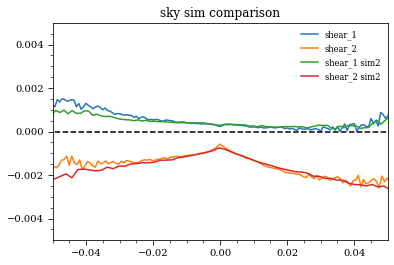

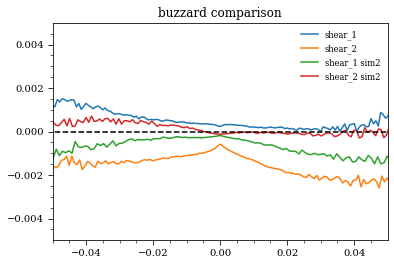

In [96]:
make_sg_plot_comp(file_in_cosmo,file_in_sky,'sky sim comparison')
make_sg_plot_comp(file_in_cosmo,file_in_buzz,'buzzard comparison')

For fun let's have a quick look at the redshift distributions

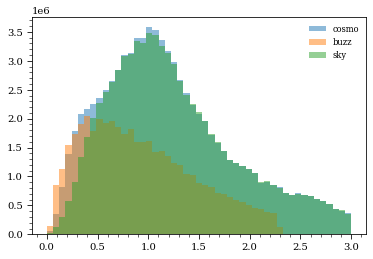

In [98]:
plt.figure()
bins = np.linspace(0,3.0,50)
plt.hist(file_in_cosmo['REDSHIFT'],bins=bins,alpha=0.5,label='cosmo')
plt.hist(file_in_buzz['REDSHIFT'],bins=bins,alpha=0.5,label='buzz')
plt.hist(file_in_sky['REDSHIFT'],bins=bins,alpha=0.5,label='sky')
plt.legend()
plt.show()

Now how about that odd mean value of the shears as a function of the redshift?

In [103]:
def compare_vals(file1,file2):
    print('cosmodc2')
    print(np.mean(file1['SHEAR1'])*1.e4,np.mean(file1['SHEAR2'])*1.e4)
    print('buzzard')
    print(np.mean(file2['SHEAR1'])*1.e4,np.mean(file2['SHEAR2'])*1.e4)
    print(len(file1['SHEAR1'])/1.e5,len(file2['SHEAR1'])/1.e5)
    return 

def compare_vals_z(file1,file2,catname, catname2):
    
    bn=np.linspace(0.0,3.0,61)
    
    z = file1['REDSHIFT']
    zb = file2['REDSHIFT']
    s1 = file1['SHEAR1']
    s2 = file1['SHEAR2']
    if catname2=='skysim':
        s1b = -file2['SHEAR1']
        s2b = -file2['SHEAR2']
    else:
        s1b = file2['SHEAR1']
        s2b = file2['SHEAR2']

    
    s1z, zedge, binn = bs(z, s1, bins=bn, statistic = 'mean')
    s2z, zedge, binn = bs(z, s2, bins=bn, statistic = 'mean')
    s1zb, zedgeb, binnb = bs(zb, s1b, bins=bn, statistic = 'mean')
    s2zb, zedgeb, binnb = bs(zb, s2b, bins=bn, statistic = 'mean')

    zm = (zedge[1:]+zedge[:-1])/2.
    zmb = (zedgeb[1:]+zedgeb[:-1])/2.
    
    plt.figure()
    plt.title(catname)
    plt.plot(zm,s1z, label='s1')
    plt.plot(zm,s2z, label='s2')
    plt.plot(zm,np.zeros(len(zm)),'k--')
    plt.legend()
    plt.show()
    plt.figure()
    plt.title(catname2)
    plt.plot(zmb,s1zb, label='s1')
    plt.plot(zmb,s2zb, label='s2')
    plt.plot(zmb,np.zeros(len(zmb)),'k--')
    plt.legend()
    plt.show()


    plt.figure()
    plt.title('comparison')
    plt.plot(zm,s1z,label='s1 cat1')# sky fraction for cancellation
    plt.plot(zm,s2z, label='s1 cat1')
    plt.plot(zmb,s1zb,'--',label='s1 cat2')
    plt.plot(zmb,s2zb,'--', label='s2 cat2')
    plt.plot(zmb,np.zeros(len(zmb)),'k--')
    plt.legend()
    plt.show()
    return zm,s1zb,s2zb

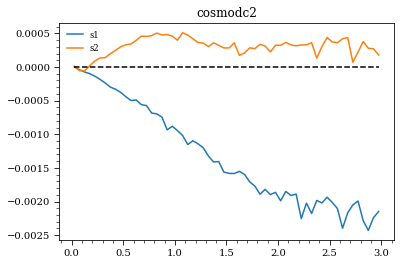

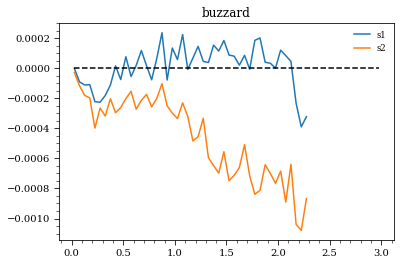

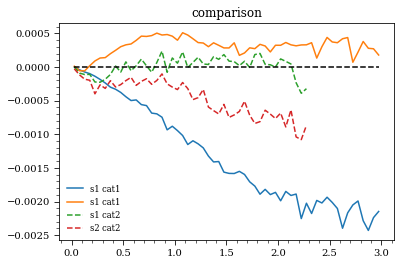

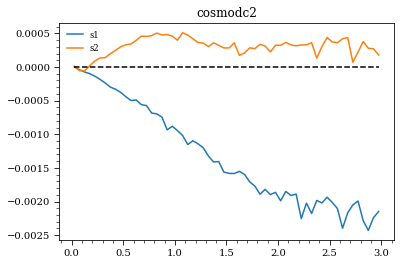

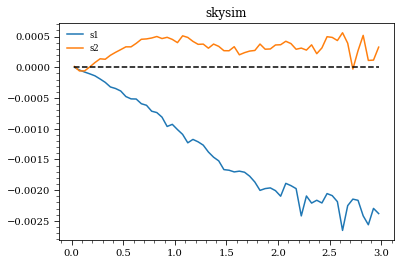

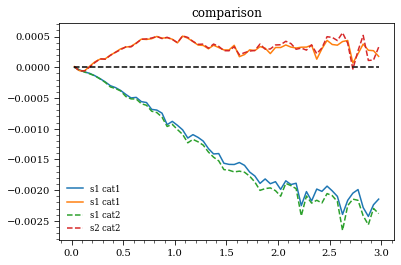

In [107]:
zmm,s1zm,s2zm=compare_vals_z(file_in_cosmo,file_in_buzz,'cosmodc2','buzzard')
zmm,s1zm,s2zm=compare_vals_z(file_in_cosmo,file_in_sky,'cosmodc2','skysim')

Again we see that these features exist in both catalogs, in one instance in s1, in the other in s2. The level in the cosmodc2 patch is about twice as high which is consistent with the difference in the seagull (suggestive but not conclusive that this could be related). However you may remember that the values I found in the lensing maps weren't quite consistent with this. Those values for s1 look like this:

So why do the galaxy values differ from the maps? Let's keep looking.

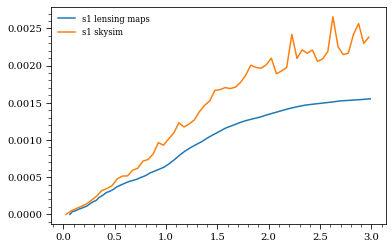

In [116]:
zz = np.array([0.063221, 0.089164, 0.115479, 0.141379, 0.170235, 0.198763,
       0.22817 , 0.257155, 0.287749, 0.319767, 0.349655, 0.383334,
       0.418124, 0.45316 , 0.487271, 0.521051, 0.558721, 0.598478,
       0.637283, 0.675554, 0.71545 , 0.757548, 0.801898, 0.844526,
       0.913068, 0.982917, 1.030879, 1.081381, 1.129711, 1.180702,
       1.233806, 1.290175, 1.348723, 1.405039, 1.463876, 1.519299,
       1.577538, 1.645399, 1.709484, 1.769094, 1.83975 , 1.913608,
       1.982815, 2.055412, 2.131457, 2.211496, 2.284789, 2.36185 ,
       2.442258, 2.527201, 2.615598, 2.695359, 2.793505, 2.895901,
       2.988802])
szz= np.array([-1.79690892e-06,  3.71613636e-05,  4.56298356e-05,  6.44934317e-05,
        7.76978968e-05,  9.42474819e-05,  1.10174762e-04,  1.39280778e-04,
        1.66429759e-04,  1.86922953e-04,  2.27541924e-04,  2.54742975e-04,
        2.91564145e-04,  3.10535517e-04,  3.34709838e-04,  3.68789973e-04,
        3.93313661e-04,  4.17275591e-04,  4.40153866e-04,  4.54800585e-04,
        4.70936037e-04,  4.96829467e-04,  5.20905565e-04,  5.56005175e-04,
        5.93945085e-04,  6.35494171e-04,  6.80334078e-04,  7.34390579e-04,
        7.91168076e-04,  8.45769022e-04,  8.92532536e-04,  9.35699648e-04,
        9.77543986e-04,  1.02817944e-03,  1.07317479e-03,  1.11339992e-03,
        1.15783868e-03,  1.19363973e-03,  1.22842665e-03,  1.25650874e-03,
        1.28176679e-03,  1.30646338e-03,  1.33757708e-03,  1.36577061e-03,
        1.39616104e-03,  1.42646649e-03,  1.44897853e-03,  1.46945135e-03,
        1.48266044e-03,  1.49596827e-03,  1.51002681e-03,  1.52451462e-03,
        1.53348007e-03,  1.54267888e-03,  1.55306528e-03])
plt.figure()
plt.plot(zz,szz,label='s1 lensing maps')
plt.plot(zmm,-s1zm,label='s1 skysim')
plt.legend()
plt.show()

In [105]:
def plot_gals(file_in):
    ra = file_in['RA']
    dec = file_in['DEC']
    z = file_in['REDSHIFT']
    plt.figure()
    plt.hist2d(ra,dec,bins=100)
    plt.colorbar()
    plt.show()

Again mostly for fun let's have a quick look at what these maps look like - I had to use a different octant because of the different sky areas but these should be at the same location relative to the poles and have the same area and shape. 

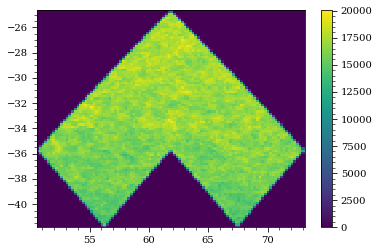

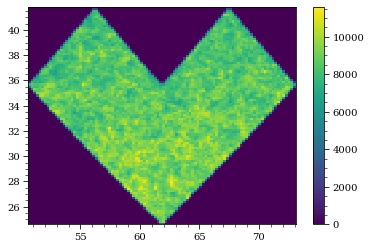

In [106]:
plot_gals(file_in_cosmo)
plot_gals(file_in_buzz)

Now we're going to test whether the same holds for area-averaged shear computations rather than galaxy-averaged ones. 

In [114]:
def get_cts(file_in,zmin,zmax,nside):
    '''get number of galaxies in a pixel for given redshift bounds and nside'''
    z = file_in['REDSHIFT']
    z_mask = (z>zmin)&(z<zmax)
    idx_shuff = np.arange(len(z[z_mask]))
    np.random.shuffle(idx_shuff)

    ra = file_in['RA'][z_mask][idx_shuff]
    dec = file_in['DEC'][z_mask][idx_shuff]
    s1 = file_in['SHEAR1'][z_mask][idx_shuff]
    s2 = file_in['SHEAR2'][z_mask][idx_shuff]
            
    map_l1 = np.zeros(hp.nside2npix(nside))

    pixs_tot = hp.ang2pix(nside,ra,dec,lonlat=True)
    pixs, idx_unique, cts = np.unique(pixs_tot,return_counts=True,return_index = True)
    
    map_l1[pixs] = cts

    return map_l1


def make_map(file_in,zmin,zmax,nside):
    '''make map of shear values from galaxies (not exact but a more efficient way with increasing nside)'''
    z = file_in['REDSHIFT']
    z_mask = (z>zmin)&(z<zmax)
    idx_shuff = np.arange(len(z[z_mask])) #shuffling indices to avoid position in file bias
    np.random.shuffle(idx_shuff)

    ra = file_in['RA'][z_mask][idx_shuff]
    dec = file_in['DEC'][z_mask][idx_shuff]
    s1 = file_in['SHEAR1'][z_mask][idx_shuff]
    s2 = file_in['SHEAR2'][z_mask][idx_shuff]
            
    map_l1 = np.zeros(hp.nside2npix(nside))
    map_s1 = np.zeros(hp.nside2npix(nside))
    map_s2 = np.zeros(hp.nside2npix(nside))

    pixs_tot = hp.ang2pix(nside,ra,dec,lonlat=True)
    pixs, idx_unique, cts = np.unique(pixs_tot,return_counts=True,return_index = True)
    mask_cts = cts>0
    pixs = pixs[mask_cts]
    idx_unique = idx_unique[mask_cts]
    pix_array = np.zeros(len(pixs))    
    for i in range(10): # average over 11 galaxies per pixel
        map_s1[pixs] += s1[idx_unique]
        map_s2[pixs] += s2[idx_unique]
        map_l1[pixs] +=1
        s1 = np.delete(s1,idx_unique)
        s2 = np.delete(s2,idx_unique)
        pixs_tot = np.delete(pixs_tot,idx_unique)
        pixs, idx_unique, cts = np.unique(pixs_tot,return_counts=True,return_index = True)
        mask_cts = cts>0
        pixs = pixs[mask_cts]
        idx_unique = idx_unique[mask_cts]
  
    map_s1[pixs] += s1[idx_unique]
    map_s2[pixs] += s2[idx_unique]
    map_l1[pixs] +=1
    return pixs, map_l1, map_s1, map_s2

def create_a_arrays(file_in, nside):
    '''just for cosmodc2 for now'''
    
    z_vals = np.linspace(0.0,3.0,11)
    z_mins = z_vals[:-1]
    z_maxs = z_vals[1:]
    z_means = (z_mins+z_maxs)/2.

    # mask to cut out bordering regions
    mask_plain = np.zeros(hp.nside2npix(8))
    mask_plain[np.array([565,597,598])]=1 # cosmodc2 values
    mask_nside = hp.ud_grade(mask_plain,nside_out=nside)

    a1=[];a2=[]
    time_start = time.time()
    for i in range(10):
        print(i)
        pixs, map_l1, map_s1, map_s2 =make_map(file_in,z_mins[i],z_maxs[i],nside)
        map_l1 = map_l1*mask_nside
        map_s1 = map_s1*mask_nside
        map_s2 = map_s2*mask_nside
        map_s1[map_l1>0] = map_s1[map_l1>0]/map_l1[map_l1>0]
        map_s2[map_l1>0] = map_s2[map_l1>0]/map_l1[map_l1>0]
        a1.append(np.nanmean(map_s1[map_l1>0]))
        a2.append(np.nanmean(map_s2[map_l1>0]))
    print('Time elapsed = '+str(time.time()-time_start))
    a1 = np.array(a1); a2 = np.array(a2)
    return a1,a2,z_means


In [118]:
#a1_512, a2_512, zm = create_a_arrays(file_in_cosmo,512) # takes about 250s to run 
a1_2048, a2_2048, zm = create_a_arrays(file_in_cosmo,2048) # takes about 260s to run 


0
1
2
3
4
5
6
7
8
9
Time elapsed = 259.9417986869812


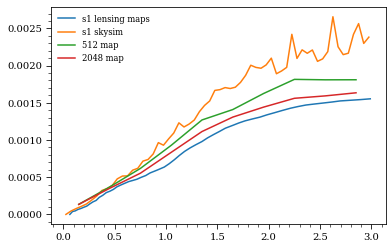

In [121]:
plt.figure()
plt.plot(zz,szz,label='s1 lensing maps')
plt.plot(zmm,-s1zm,label='s1 skysim')
plt.plot(zm,-a1_512,label='512 map')
plt.plot(zm,-a1_2048,label='2048 map')
plt.legend()
plt.show()

So the discrepancy between the maps and the galaxies comes from the averaging over galaxies rather than area. Effectively what you're doing is having a galaxy density weighted average... 

But wait, should this make a difference on this sky? We can compute the density weighted average and compare the two to see if there's a bias.

In [130]:
def check_galbias(file_in, zmin,zmax,nside,shuffled=False):
    ''''''
    map_ll = get_cts(file_in,zmin,zmax,nside)
    pixs, map_l1, map_s1, map_s2 =make_map(file_in,zmin,zmax,nside)
    print('computed maps')
    mask_plain = np.zeros(hp.nside2npix(32))
    # forgive the hard coding here, you can calculate it from the 3 nside 8 pixels converted to nside 32 in ring format for cosmodc2
    pix_list = np.array([ 8790,  8917,  8918,  9045,  9046,  9047,  9172,  9173,  9174,
        9175,  9300,  9301,  9302,  9303,  9304,  9427,  9428,  9429,
        9430,  9431,  9432,  9555,  9556,  9557,  9558,  9559,  9560,
        9561,  9682,  9683,  9684,  9685,  9686,  9687,  9688,  9689,
        9811,  9812,  9813,  9815,  9816,  9817,  9939,  9940,  9943,
        9944, 10068, 10072])
    pix_list2 = np.array([ 8790,  8917,  8918,  9045,  9046,  9047,  9172,  9173,  9174,
        9175,  9300,  9301,  9302,  9303,  9304,  9427,  9428,  9429,
        9430,  9431,  9432,  9555,  9556,  9557,  9558,  9559,  9560,
        9561,  9682,  9683,  9684,  9685,  9686,  9687,  9688,  9689,
        9811,  9812,  9813,  9815,  9816,  9817,  9939,  9940,  9943,
        9944, 10068, 10072])
    
    diffs1 = []
    diffs2 = []
    if shuffled:
        np.random.shuffle(pix_list2)
        print('shuffling!')
    pixc = len(pix_list)
    for i in range(pixc):
        print(i)
        mask_plain = np.zeros(hp.nside2npix(32))
        mask_plain[pix_list[i]]=1.0
        mask_nside = hp.ud_grade(mask_plain,nside_out=nside)
        
        mask_plain2 = np.zeros(hp.nside2npix(32))
        mask_plain2[pix_list2[i]]=1.0
        mask_nside2 = hp.ud_grade(mask_plain2,nside_out=nside)
        
        a = np.mean(map_s1[mask_nside==1.0])
        b = np.sum((map_s1[mask_nside==1.0]*map_ll[mask_nside2==1.0])/np.sum(map_ll[mask_nside2==1.0]))
        diffs1.append(b-a)
        a = np.mean(map_s2[mask_nside==1.0])
        b = np.sum((map_s2[mask_nside==1.0]*map_ll[mask_nside2==1.0])/np.sum(map_ll[mask_nside2==1.0]))
        diffs2.append(b-a)
    diffs1 = np.array(diffs1)
    diffs2 = np.array(diffs2)
    return diffs1,diffs2,pix_list,pix_list2
        

In [136]:
d1,d2,pl,pl2 = check_galbias(file_in_cosmo,0.8,1.0,2048,shuffled=False)
d1s,d2s,pls,pl2s = check_galbias(file_in_cosmo,0.8,1.0,2048,shuffled=True)

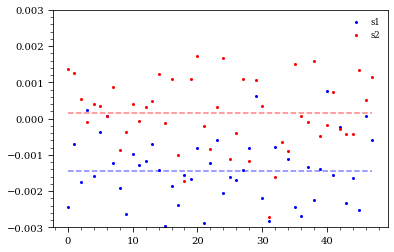

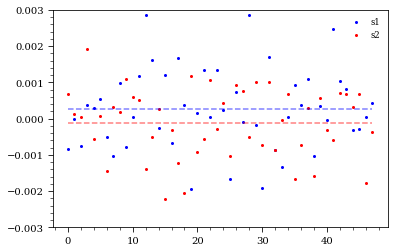

In [135]:
idxv = np.arange(len(pl))
plt.figure()
plt.scatter(idxv,d1,s=4.0,color='b',label='s1')
plt.scatter(idxv, d2,s=4.0,color='r',label='s2')
plt.plot(idxv,np.ones(len(pl))*np.mean(d1),'b--',alpha=0.5)
plt.plot(idxv,np.ones(len(pl))*np.mean(d2),'r--',alpha=0.5)
plt.legend()
plt.ylim([-0.003,0.003])
plt.show()
plt.figure()
plt.scatter(idxv,d1s,s=4.0,color='b',label='s1')
plt.scatter(idxv,d2s,s=4.0,color='r',label='s2')
plt.plot(np.arange(len(pls)),np.ones(len(pls))*np.mean(d1s),'b--',alpha=0.5)
plt.plot(np.arange(len(pls)),np.ones(len(pls))*np.mean(d2s),'r--',alpha=0.5)
plt.legend()
plt.ylim([-0.003,0.003])
plt.show()

There clearly is some correlation between the galaxies and the lensing maps affecting this. Now this doesn't mean that should be there in the real sky at the same level, but it is there in the simulation. This is what's causing some of the confusion. So now what happens if we calculate the seagulls from the maps instead of the galaxies? The result is unfortunately a bit too noisy to tell for now, but I'll go back and compute that on the maps directly.

In [142]:
def make_seagull_map(file_in, zmin,zmax,nside):
    ''''''
    map_ll = get_cts(file_in,zmin,zmax,nside)
    pixs, map_l1, map_s1, map_s2 =make_map(file_in,zmin,zmax,nside)
    print('computed maps')
    
    mask_plain = np.zeros(hp.nside2npix(32))
    # forgive the hard coding here, you can calculate it from the 3 nside 8 pixels converted to nside 32 in ring format for cosmodc2
    pix_list = np.array([ 8790,  8917,  8918,  9045,  9046,  9047,  9172,  9173,  9174,
        9175,  9300,  9301,  9302,  9303,  9304,  9427,  9428,  9429,
        9430,  9431,  9432,  9555,  9556,  9557,  9558,  9559,  9560,
        9561,  9682,  9683,  9684,  9685,  9686,  9687,  9688,  9689,
        9811,  9812,  9813,  9815,  9816,  9817,  9939,  9940,  9943,
        9944, 10068, 10072])

    mask_plain = np.zeros(hp.nside2npix(32))
    mask_plain[pix_list[i]]=1.0
    mask_nside = hp.ud_grade(mask_plain,nside_out=nside)
    
    bn = 500
    s1 = map_s1[mask_nside==1.0]
    s2 = map_s2[mask_nside==1.0]
    
    a, zedge, binn = bs(s1, s2, bins=bn, statistic='mean')
    a2, zedge2, binn = bs(s2, s1, bins=bn, statistic = 'mean')
    zvals = (zedge[1:]+zedge[:-1])/2.
    zvals2 = (zedge2[1:]+zedge2[:-1])/2.

    plt.figure()
    plt.title('cosmodc2 (map)')
    plt.plot(zvals,a,label='shear_1')
    plt.plot(zvals2,a2,label='shear_2')
    plt.xlim([-0.3,0.3])
    plt.ylim([-0.1,0.1])
    plt.plot(zvals,np.zeros(len(a)),'k--')
    plt.legend()
    plt.show()

    
    return 

computed maps


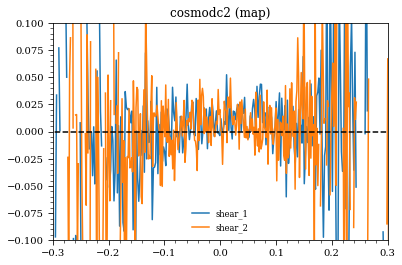

In [144]:
make_seagull_map(file_in_cosmo,0.3,1.5,2048)

### Rotation values in case this is needed later

          // 0 = no rotation
          // 1 = swap(x, y) rotation applied
          // 2 = swap(y, z) rotation applied
          // 3 = swap(x, y) then swap(y, z) rotations applied 
          
So we start off with the normal simulation with x,y swapped. 
Then the next one along is a further y,z swap.  The direction of RA/Dec relative to x,y,z is important here. 
